In [132]:
import sympy
import numpy as np
import networkx as nx
import string
import pydotplus
import graphviz
import math
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
%matplotlib inli

In [21]:
dist = sympy.randMatrix(r= 20 ,c = 20, min = 1, max =99, symmetric= True, seed = 6)
# sympy 의 인덱스 접근은 [r][c] 형식이 아닌 [r,c]형식로 해야함

for i in range(20):
    dist[i,i] = 0

dt = [('len', float)]
dist = np.array(dist,dtype='float64')
dist = dist.view(dt)
print(dist)

[[( 0.,) (11.,) (63.,) (98.,) (34.,) ( 5.,) ( 1.,) (19.,) (85.,) (76.,)
  (61.,) (98.,) (95.,) (48.,) (41.,) (99.,) ( 3.,) (35.,) (63.,) (26.,)]
 [(11.,) ( 0.,) (53.,) (69.,) (70.,) (88.,) (13.,) (25.,) (73.,) (71.,)
  (90.,) (94.,) (34.,) (85.,) (79.,) (88.,) (12.,) (55.,) (43.,) (12.,)]
 [(63.,) (53.,) ( 0.,) (53.,) (33.,) (57.,) (90.,) (13.,) (97.,) (26.,)
  (90.,) (82.,) (38.,) (13.,) ( 6.,) (76.,) (26.,) (84.,) (47.,) (63.,)]
 [(98.,) (69.,) (53.,) ( 0.,) (66.,) (74.,) (83.,) (90.,) (65.,) ( 4.,)
  (82.,) (47.,) (32.,) (78.,) (56.,) (39.,) (46.,) (76.,) (16.,) (12.,)]
 [(34.,) (70.,) (33.,) (66.,) ( 0.,) (87.,) (68.,) (26.,) (15.,) (78.,)
  (85.,) (35.,) (40.,) (93.,) (26.,) (49.,) (62.,) (29.,) (18.,) (77.,)]
 [( 5.,) (88.,) (57.,) (74.,) (87.,) ( 0.,) (90.,) (67.,) ( 2.,) (25.,)
  (22.,) ( 3.,) (83.,) (43.,) (72.,) (86.,) (80.,) (80.,) (40.,) (48.,)]
 [( 1.,) (13.,) (90.,) (83.,) (68.,) (90.,) ( 0.,) (68.,) (50.,) (38.,)
  (17.,) (87.,) (63.,) ( 7.,) (24.,) (55.,) (77.,) (96.,) 

In [22]:
Graph = nx.from_numpy_matrix(dist)
Graph = nx.relabel_nodes(Graph, dict(zip(range(len(Graph.nodes())),string.ascii_uppercase)))    

Graph = nx.drawing.nx_agraph.to_agraph(Graph)

Graph.node_attr.update(color="red", style="filled")
Graph.edge_attr.update(color="blue", width="2.0")

Graph.draw('outgraph.png', format='png', prog='neato')
Graph.draw('outdot.dot', format='dot', prog='neato')

In [23]:
Dot = graphviz.Source.from_file('outdot.dot')


In [31]:
parsed_dot = pydotplus.parse_dot_data(Dot.source)

In [83]:
nodes = parsed_dot.get_node_list()
# 노드 정보들이 담긴 리스트

In [84]:
position_list = []
for i,node in enumerate(nodes):
    pos_val = node.get_pos()
    print(pos_val)

None
None
None
"1337.1,645.17"
"1964.8,1342.8"
"1900.2,288.53"
"1719.8,2121.6"
"27,1809.6"
"1036.4,937.51"
"1304.8,578.65"
"2505.6,1204.2"
"1018,1090.1"
"2011.6,2107.2"
"105.28,671.01"
"821,866.73"
"3399.9,80.366"
"1188.9,18"
"1605.9,724.79"
"1892.1,701.98"
"1567.5,665.68"
"769.74,1739.2"
"889.49,2844.8"
"1166.4,1263.3"


In [163]:
position_list = []
for i,node in enumerate(nodes):
    pos_val = node.get_pos()
    arr = []
    if pos_val == None:
        continue
    else:
        x = float(pos_val.split(',')[0].replace('"',""))
        y = float(pos_val.split(',')[1].replace('"',""))
        # 각노드의 x,y좌표를 dotsource 에서 접근
        arr.append(i-2)
        arr.append(x)
        arr.append(y)
    position_list.append(arr)

In [166]:
points = np.array(position_list,dtype = 'float64')[:,1:3]
ch = ConvexHull(points)

hull_indices = ch.vertices

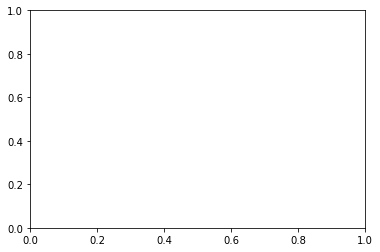

In [171]:
hull_pts = points[hull_indices,:]
plt.plot(points[:, 0], points[:, 1], 'ko', markersize=10)
plt.fill(hull_pts[:,0], hull_pts[:,1], fill=False, edgecolor='b')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()